# exploration

In [96]:
import pandas as pd
df = pd.read_csv("./data/generated_data.csv")
print(df.shape)
df.info()
df.describe()

(100000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   policy_id       100000 non-null  float64
 1   demand_pattern  100000 non-null  float64
 2   C1              100000 non-null  float64
 3   C2              100000 non-null  float64
 4   C3              100000 non-null  float64
 5   C4              100000 non-null  float64
 6   C5              100000 non-null  float64
 7   C6              100000 non-null  float64
 8   C7              100000 non-null  float64
 9   C8              100000 non-null  float64
 10  C9              100000 non-null  float64
 11  C10             100000 non-null  float64
 12  C11             100000 non-null  float64
 13  C12             100000 non-null  float64
 14  C13             100000 non-null  float64
 15  C14             100000 non-null  float64
 16  cost            100000 non-null  float64
dty

,policy_id,demand_pattern,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,cost
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000
mean,499.500000,49.500000,220.177000,283.507000,239.090000,259.419000,279.65500,54.972000,39.006000,27.499000,93.812000,31.056000,121.859000,27.489000,19.0,15.0,480.668430
std,288.676434,28.866214,6.105247,7.755421,6.424976,6.847329,7.57869,1.364271,0.807447,0.500002,2.568798,0.820287,3.102453,0.499881,0.0,0.0,158.023120
min,0.000000,0.000000,210.000000,270.000000,229.000000,248.000000,267.00000,53.000000,38.000000,27.000000,90.000000,30.000000,117.000000,27.000000,19.0,15.0,224.506000
25%,249.750000,24.750000,215.000000,277.000000,233.000000,253.000000,273.00000,54.000000,38.000000,27.000000,92.000000,30.000000,119.000000,27.000000,19.0,15.0,369.281375
50%,499.500000,49.500000,220.000000,284.000000,239.000000,259.000000,280.00000,55.000000,39.000000,27.000000,94.000000,31.000000,122.000000,27.000000,19.0,15.0,451.111500
75%,749.250000,74.250000,226.000000,290.000000,245.000000,265.000000,286.00000,56.000000,40.000000,28.000000,96.000000,32.000000,124.250000,28.000000,19.0,15.0,550.564250
max,999.000000,99.000000,230.000000,296.000000,250.000000,271.000000,292.00000,57.000000,40.000000,28.000000,98.000000,32.000000,127.000000,28.000000,19.0,15.0,1387.609500


Text(0.5, 1.0, 'Distribution of Cost')

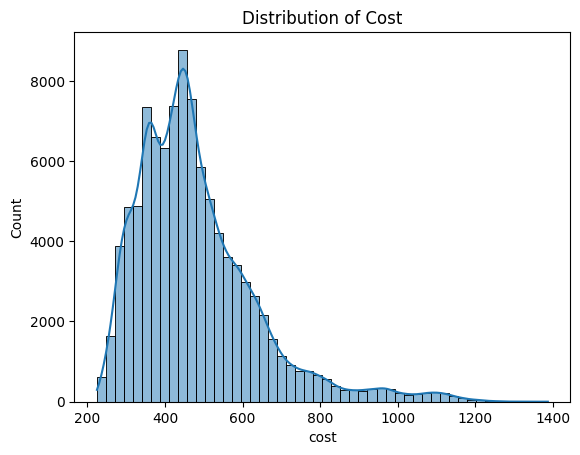

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['cost'], bins=50, kde=True)
plt.title("Distribution of Cost")


Text(0.5, 1.0, 'Correlation with Cost')

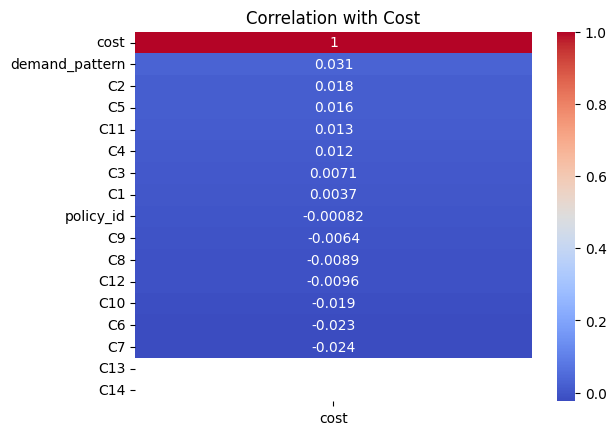

In [98]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['cost']].sort_values(by='cost', ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation with Cost")


In [107]:
nunique = df.nunique()
print("Constant columns:", nunique[nunique == 1])
print(X_input[['C13', 'C14']].nunique())
print(X_input[['C13', 'C14']].head())


Constant columns: Series([], dtype: int64)
C13    1
C14    1
dtype: int64
   C13  C14
0  200  200


In [110]:
#dropping C13 & C14 
X_input = X_input.drop(columns=[col for col in ['C13', 'C14'] if col in X_input.columns])


Text(0.5, 1.0, 'Cost Distribution per Demand Pattern')

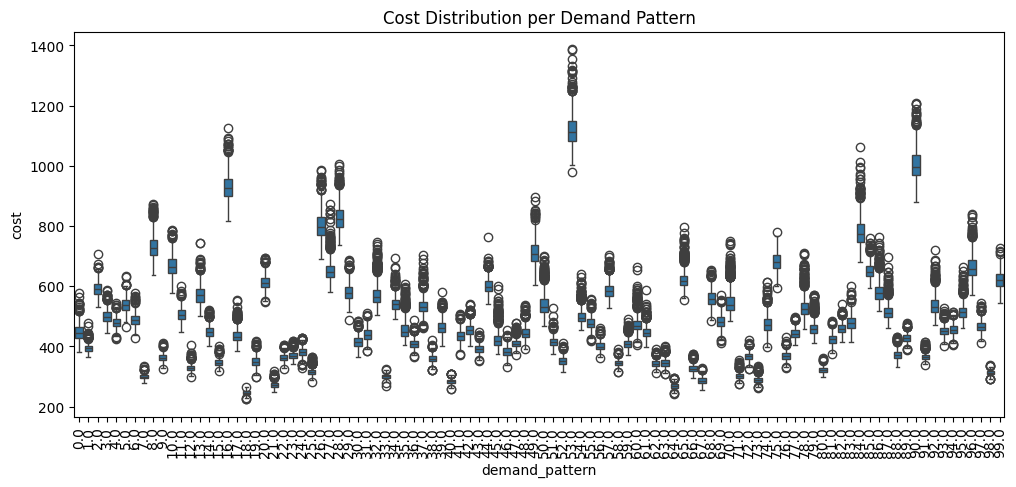

In [111]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='demand_pattern', y='cost')
plt.xticks(rotation=90)
plt.title("Cost Distribution per Demand Pattern")


In [117]:
df = df.drop_duplicates()
print(f"Remaining rows after deduplication: {len(df)}")


Remaining rows after deduplication: 100000


# Initial Attempt

In [69]:
import numpy as np
import pandas as pd
from supply_chain_config import SupplyChainConfig
from evaluate import Evaluate
from dynamics import Dynamics
from policy import StaticBaseStockPolicyRandom

# Setup
config = SupplyChainConfig()
dynamics = Dynamics(config)
evaluator = Evaluate(config, dynamics, num_trajectories=1, periods_per_trajectory=60)

# Parameters
num_policies = 200
num_demand_patterns = 10
hedging = 0.1

# Helper: create random deviations for policies
def create_deviation(deviations):
    return [np.random.randint(0, max(1, deviation)) for deviation in deviations]

base_policy = StaticBaseStockPolicyRandom(config, hedging)
base_levels = np.array(base_policy.base_stock_levels)

records = []
for pattern in range(num_demand_patterns):
    for _ in range(num_policies):
        deviations = create_deviation(base_levels // 10)
        policy = StaticBaseStockPolicyRandom(config, hedging, deviations=deviations)
        levels = policy.base_stock_levels
        cost = evaluator.evaluate_policy(policy)
        
        row = {
            "demand_pattern": pattern,
            **{f"C{i+1}": levels[i] for i in range(config.num_components)},
            "cost": cost
        }
        records.append(row)

df = pd.DataFrame(records)
df.to_csv("generated_policy_data.csv", index=False)


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

df = pd.read_csv("generated_policy_data.csv")
X = df.drop(columns=["cost"])
y = df["cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, preds))
print("MSE:", mean_squared_error(y_test, preds))


MAE: 310.0185231009929
MSE: 165362.87836134003


In [71]:
df["predicted_cost"] = model.predict(df.drop(columns=["cost"]))
best_row = df.loc[df["predicted_cost"].idxmin()]
print("Best predicted policy from data:")
print(best_row)


Best predicted policy from data:
demand_pattern      9.000000
C1                186.000000
C2                255.000000
C3                221.000000
C4                219.000000
C5                235.000000
C6                 50.000000
C7                 35.000000
C8                 24.000000
C9                 87.000000
C10                27.000000
C11               109.000000
C12                25.000000
C13                17.000000
C14                14.000000
cost              168.646667
predicted_cost    169.181625
Name: 1816, dtype: float64


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor
)
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
# Uncomment if you want to use LightGBM
import lightgbm as lgb

# Load your data
df = pd.read_csv("generated_policy_data.csv")

# -------- FEATURE ENGINEERING -------- #
# Make a copy so we don't overwrite the original
df_fe = df.copy()

# Sum of base stock levels (proxy for inventory volume)
df_fe["total_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].sum(axis=1)

# Average base stock level
df_fe["avg_stock"] = df_fe["total_stock"] / 14

# Min and max stock level
df_fe["min_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].min(axis=1)
df_fe["max_stock"] = df_fe[[f"C{i}" for i in range(1, 15)]].max(axis=1)

# Range between max and min
df_fe["stock_range"] = df_fe["max_stock"] - df_fe["min_stock"]

# Standard deviation of stock levels
df_fe["stock_std"] = df_fe[[f"C{i}" for i in range(1, 15)]].std(axis=1)

# Optional: interaction between demand pattern and total stock
df_fe["demand_x_total"] = df_fe["demand_pattern"] * df_fe["total_stock"]

# Now use this version for training
X = df_fe.drop(columns=["policy_id", "cost"], errors="ignore")

y = df_fe["cost"]


X = df.drop(columns=["cost", "policy_id"], errors="ignore")
y = df["cost"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for models that need it
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": xgb.XGBRegressor(random_state=42),
    "LightGBM": lgb.LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "MLP": MLPRegressor(random_state=42, max_iter=500)
}

# Train and evaluate
results = {}

for name, model in models.items():
    if name in ["SVR", "MLP"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    results[name] = {"MAE": mae, "MSE": mse}
    print(f"{name} - MAE: {mae:.2f}, MSE: {mse:.2f}")


Ridge - MAE: 266.67, MSE: 124915.61
Random Forest - MAE: 281.78, MSE: 133571.89
Extra Trees - MAE: 281.50, MSE: 134074.98
Gradient Boosting - MAE: 276.53, MSE: 133036.92
HistGradientBoosting - MAE: 286.11, MSE: 142513.05
XGBoost - MAE: 304.61, MSE: 160655.09
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 13
[LightGBM] [Info] Start training from score 656.000889
LightGBM - MAE: 286.06, MSE: 142637.42
SVR - MAE: 253.80, MSE: 128963.79
MLP - MAE: 268.86, MSE: 126430.59


/Users/wendydewit/ORTEC/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.



Ridge - CV MAE: 22.81, CV MSE: 745.42
Random Forest - CV MAE: 23.51, CV MSE: 902.89
Gradient Boosting - CV MAE: 22.02, CV MSE: 789.01
XGBoost - CV MAE: 21.43, CV MSE: 746.22
SVR - CV MAE: 20.80, CV MSE: 648.27
MLP - CV MAE: 20.76, CV MSE: 656.95


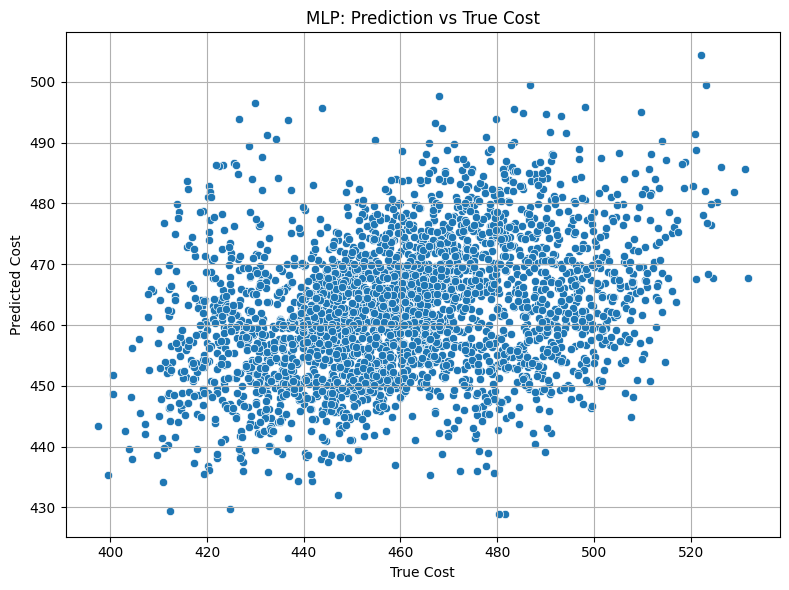

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/generated_data.csv")

# Drop duplicates and constant columns
df = df.drop_duplicates()
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=constant_cols, inplace=True)

# Define features and target
X = df.drop(columns=["cost"])
y = df["cost"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split for plotting diagnostics
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models with regularization
models = {
    "Ridge": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, reg_alpha=1, reg_lambda=1, random_state=42),
    "SVR": SVR(C=1.0, epsilon=0.2),
    "MLP": MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.001, max_iter=500, random_state=42)
}

# Evaluate with cross-validation and store predictions for the best model
results = {}
best_model_name = None
lowest_mae = float('inf')
best_preds = None

for name, model in models.items():
    mae_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=make_scorer(mean_absolute_error))
    mse_scores = cross_val_score(model, X_scaled, y, cv=5, scoring=make_scorer(mean_squared_error))
    avg_mae = mae_scores.mean()
    avg_mse = mse_scores.mean()
    results[name] = {"MAE": avg_mae, "MSE": avg_mse}
    if avg_mae < lowest_mae:
        best_model_name = name
        best_model = model
        best_model.fit(X_train, y_train)
        best_preds = best_model.predict(X_test)
    print(f"{name} - CV MAE: {avg_mae:.2f}, CV MSE: {avg_mse:.2f}")

# Diagnostic plot for the best model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_preds)
plt.xlabel("True Cost")
plt.ylabel("Predicted Cost")
plt.title(f"{best_model_name}: Prediction vs True Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


# Models

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    HistGradientBoostingRegressor,
    ExtraTreesRegressor
)
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import time

# --- 1. Load your dataset ---
df = pd.read_csv("./Data/generated_data.csv")  
# --- 2. Feature setup ---
component_cols = sorted([col for col in df.columns if col.startswith("C")])
features = component_cols + ["demand_pattern"]

# Drop constant columns
nunique = df[features].nunique()
constant_cols = nunique[nunique == 1].index.tolist()
features = [col for col in features if col not in constant_cols]

# --- 3. Prepare data ---
X = df[features]
y = df["cost"]

# --- 4. Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #default 75 - 25 train-test 

# --- 5. Define models ---
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    # "SVR": SVR(),
    # "MLP": MLPRegressor(random_state=42, max_iter=500)
}

# --- 6. Cross-validation setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for name, model in models.items():
    print(f"⏳ Starting {name}...")
    start_time = time.time()

    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    duration = time.time() - start_time
    print(f"✅ Finished {name} in {duration:.2f} seconds")

    results.append((name, mae_scores.mean(), mse_scores.mean(), duration))

# --- 7. Show CV results ---
results_df = pd.DataFrame(results, columns=["Model", "CV MAE", "CV MSE", "Time (s)"]).sort_values("CV MAE")
print("\n📊 Model Performance:")
print(results_df)


⏳ Starting Ridge...
✅ Finished Ridge in 0.09 seconds
⏳ Starting Random Forest...
✅ Finished Random Forest in 277.01 seconds
⏳ Starting Gradient Boosting...
✅ Finished Gradient Boosting in 56.20 seconds
⏳ Starting HistGradientBoosting...
✅ Finished HistGradientBoosting in 11.43 seconds
⏳ Starting Extra Trees...
✅ Finished Extra Trees in 196.43 seconds
⏳ Starting XGBoost...
✅ Finished XGBoost in 2.40 seconds

📊 Model Performance:
                  Model      CV MAE        CV MSE    Time (s)
5               XGBoost   15.860849    551.962301    2.401289
1         Random Forest   16.177081    567.226318  277.010781
4           Extra Trees   16.385670    583.536461  196.432665
3  HistGradientBoosting   19.640664    743.340168   11.433287
2     Gradient Boosting   54.767908   4887.909075   56.196216
0                 Ridge  116.605755  24891.401503    0.090221
